In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.ndimage import gaussian_filter
from sklearn.feature_selection import mutual_info_regression as mi_skl
import seaborn as sns
from scipy import stats
import time
from matplotlib import gridspec
import os

In [4]:
#testing in h2226 a28
Input_folder = r'C:\Users\fgobbo\Documents\Stefan thesis\H2225'

file_name='H2225_All_No_Session1'
pd.set_option('display.max_columns', None)
df = pd.read_csv(os.path.join(Input_folder,file_name + '.csv'), sep=',', header=0)
#df0=df0.set_index('Cell IDS', drop=True)
df

,Cell IDS,Place cells 29,Criteria 29,SI 29,Percentile 29,Place field centre_x 29,Place field centre_y 29,Rate Map 29,Place_field_bins 29,Place cells direction 0 29,Criteria direction 0 29,SI direction 0 29,Percentile direction 0 29,Place field centre_x 0 29,Place field centre_y 0 29,Rate Map 0 29,Place cells direction 1 29,Criteria direction 1 29,SI direction 1 29,Percentile direction 1 29,Place field centre_x 1 29,Place field centre_y 1 29,Rate Map 1 29,Place cells direction 2 29,Criteria direction 2 29,SI direction 2 29,Percentile direction 2 29,Place field centre_x 2 29,Place field centre_y 2 29,Rate Map 2 29,Place cells direction 3 29,Criteria direction 3 29,SI direction 3 29,Percentile direction 3 29,Place field centre_x 3 29,Place field centre_y 3 29,Rate Map 3 29,Place cells 30,Criteria 30,SI 30,Percentile 30,Place field centre_x 30,Place field centre_y 30,Rate Map 30,Place_field_bins 30,Place cells direction 0 30,Criteria direction 0 30,SI direction 0 30,Percentile direction 0 30,Place field centre_x 0 30,Place field centre_y 0 30,Rate Map 0 30,Place cells direction 1 30,Criteria direction 1 30,SI direction 1 30,Percentile direction 1 30,Place field centre_x 1 30,Place field centre_y 1 30,Rate Map 1 30,Place cells direction 2 30,Criteria direction 2 30,SI direction 2 30,Percentile direction 2 30,Place field centre_x 2 30,Place field centre_y 2 30,Rate Map 2 30,Place cells direction 3 30,Criteria direction 3 30,SI direction 3 30,Percentile direction 3 30,Place field centre_x 3 30,Place field centre_y 3 30,Rate Map 3 30,Place cells 31,Criteria 31,SI 31,Percentile 31,Place field centre_x 31,Place field centre_y 31,Rate Map 31,Place_field_bins 31,Place cells direction 0 31,Criteria direction 0 31,SI direction 0 31,Percentile direction 0 31,Place field centre_x 0 31,Place field centre_y 0 31,Rate Map 0 31,Place cells direction 1 31,Criteria direction 1 31,SI direction 1 31,Percentile direction 1 31,Place field centre_x 1 31,Place field centre_y 1 31,Rate Map 1 31,Place cells direction 2 31,Criteria direction 2 31,SI direction 2 31,Percentile direction 2 31,Place field centre_x 2 31,Place field centre_y 2 31,Rate Map 2 31,Place cells direction 3 31,Criteria direction 3 31,SI direction 3 31,Percentile direction 3 31,Place field centre_x 3 31,Place field centre_y 3 31,Rate Map 3 31
0,C012,0.0,[1. 1. 0. 0.],0.003749,99.95,604.5808,348.9520,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,"[[0, 7], [0, 8], [0, 9], [0, 12], [1, 11], [1,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 0. 0. 0.],0.006302,6.04,561.9760,178.5328,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 0. 0. 0.],0.006882,89.29,647.1856,434.1616,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 0. 0. 0.],0.003871,68.91,221.1376,135.9280,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,"[[0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 1...",0.0,[1. 0. 0. 0.],0.004506,6.34,221.1376,135.9280,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 0. 0. 0.],0.006303,80.05,135.9280,434.1616,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 0. 0. 0.],0.006047,26.54,135.9280,391.5568,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 0. 0. 0.],0.005478,50.34,647.1856,561.9760,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C205,0.0,[1. 1. 0. 0.],0.009235,100.00,135.9280,647.1856,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[[12, 12], [12, 13], [12, 14], [13, 12], [13, ...",0.0,[1. 1. 0. 0.],0.005715,100.00,135.9280,647.1856,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 1. 0. 0.],0.023088,100.00,135.9280,647.1856,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,[1. 1. 0. 0.],0.009131,99.98,135.9280,647.1856,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 1. 0. 0.],0.003943,100.00,263.7424,689.7904,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

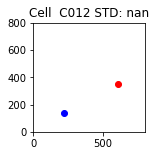

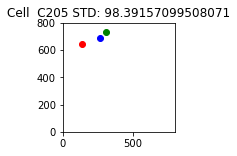

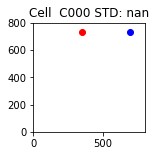

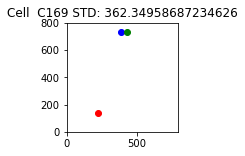

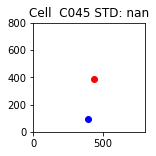

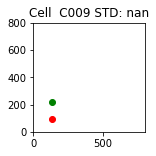

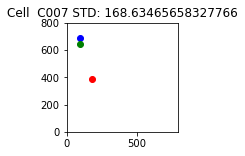

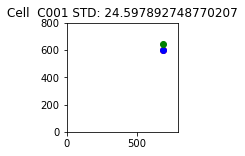

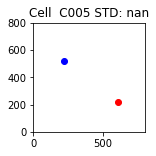

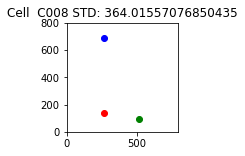

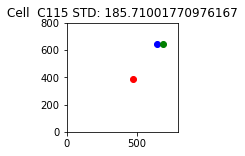

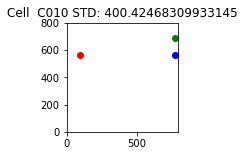

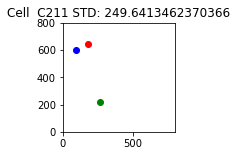

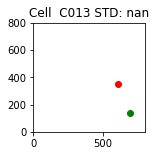

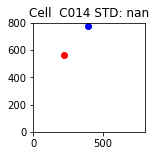

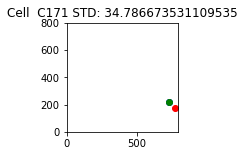

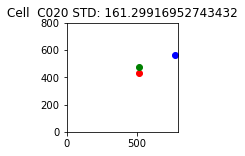

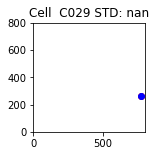

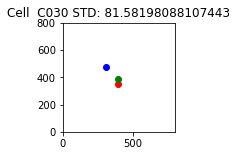

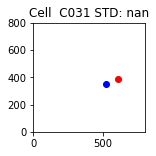

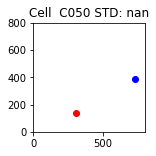

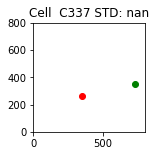

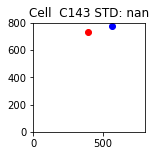

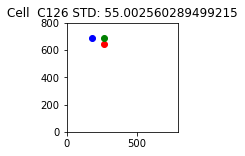

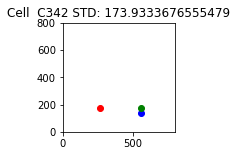

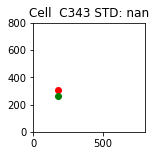

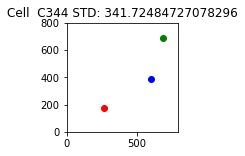

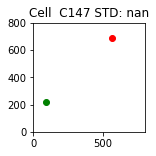

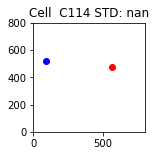

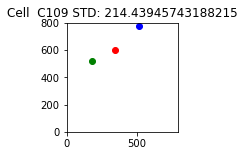

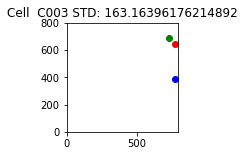

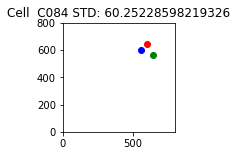

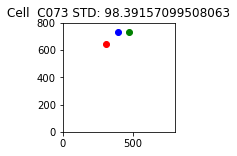

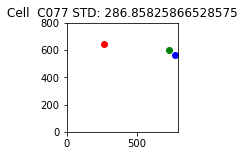

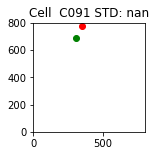

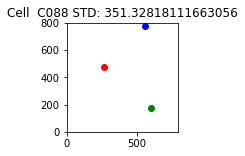

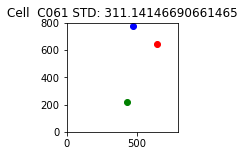

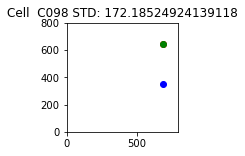

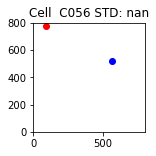

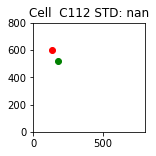

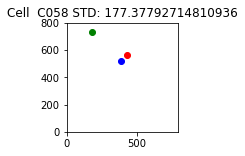

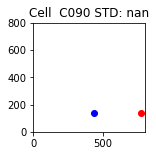

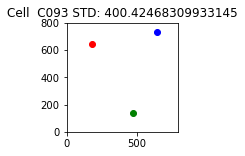

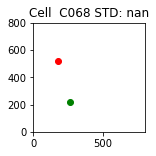

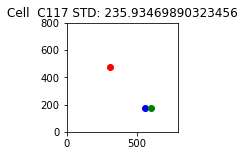

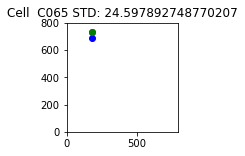

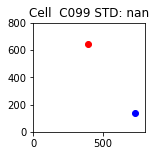

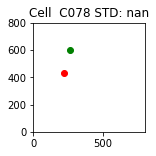

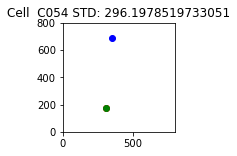

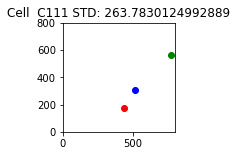

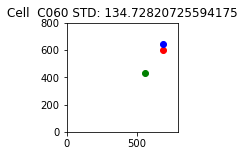

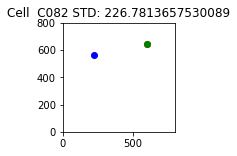

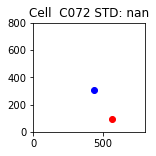

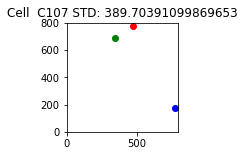

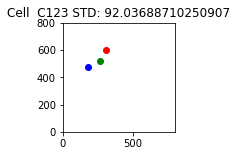

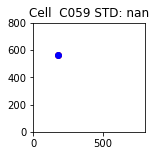

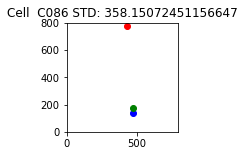

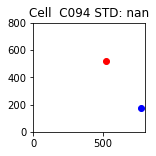

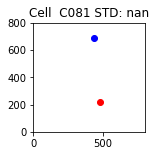

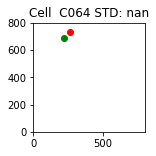

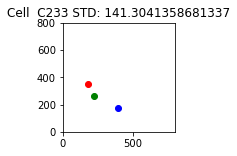

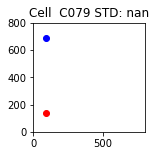

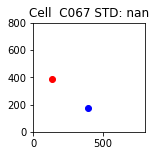

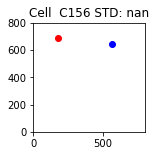

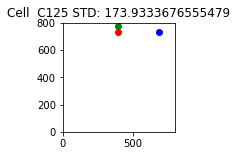

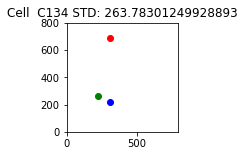

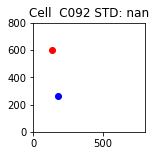

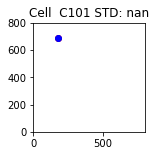

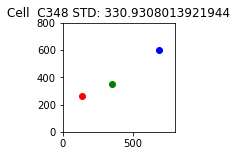

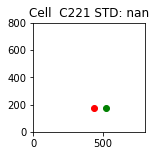

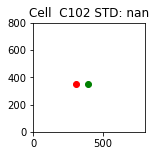

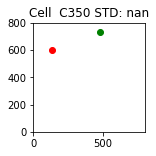

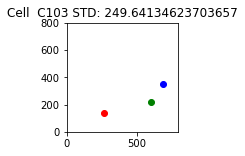

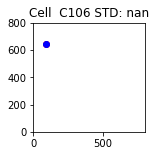

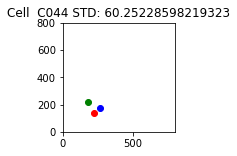

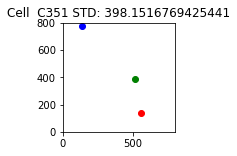

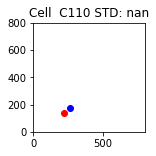

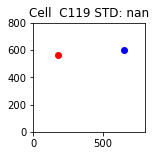

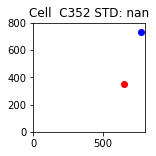

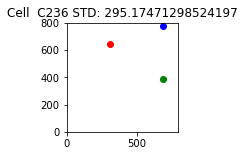

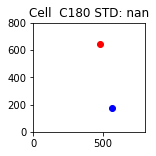

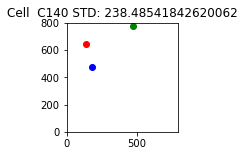

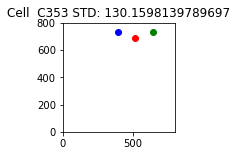

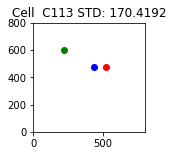

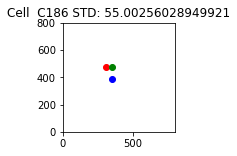

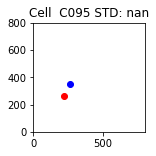

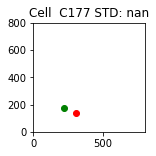

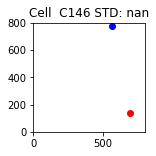

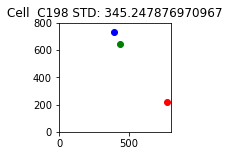

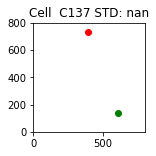

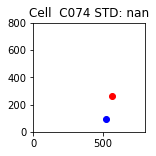

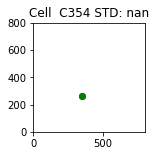

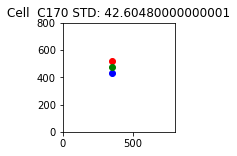

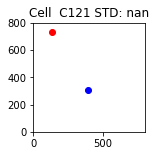

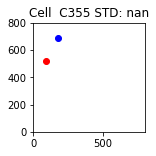

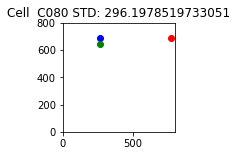

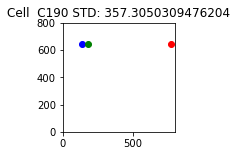

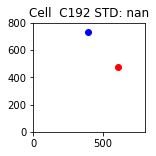

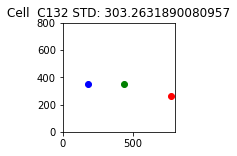

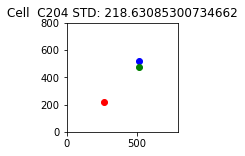

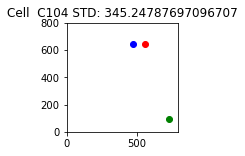

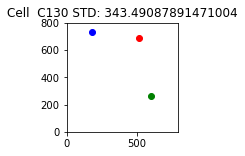

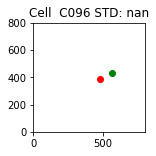

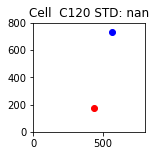

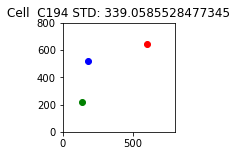

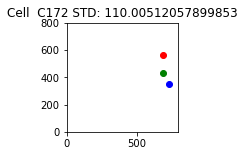

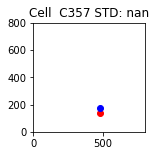

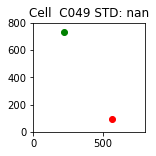

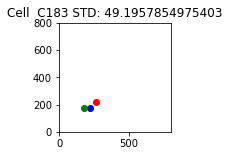

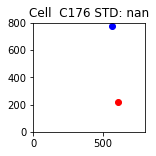

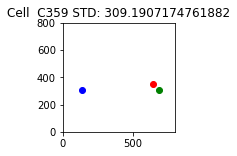

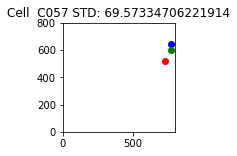

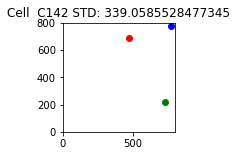

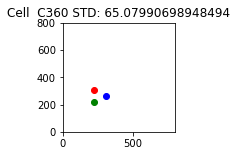

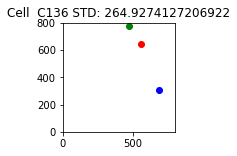

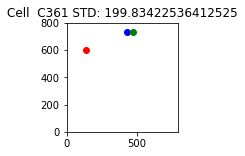

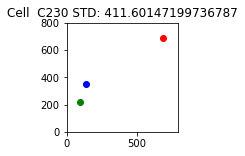

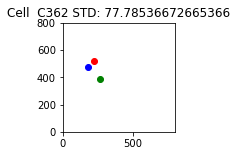

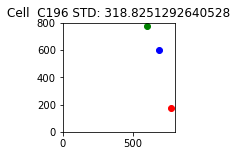

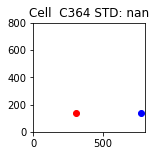

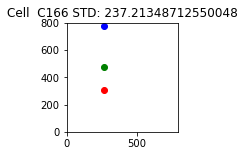

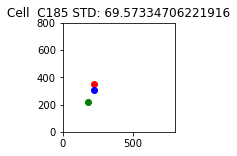

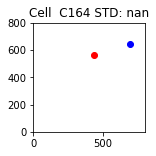

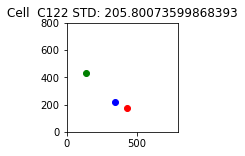

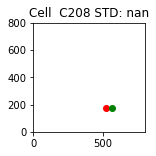

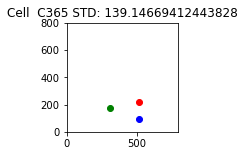

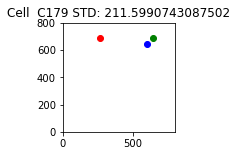

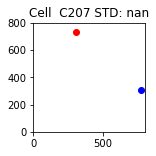

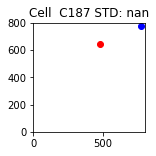

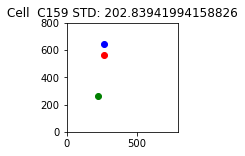

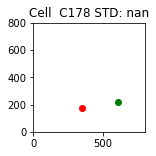

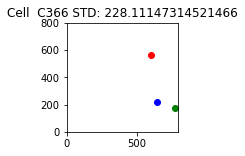

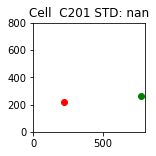

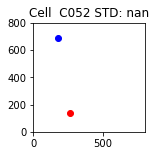

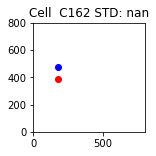

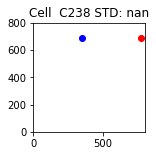

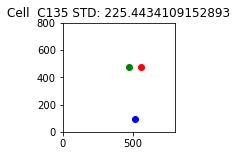

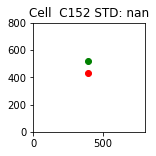

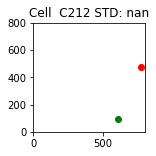

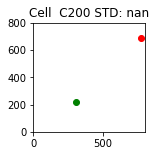

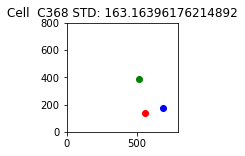

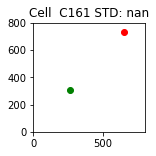

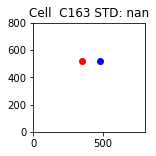

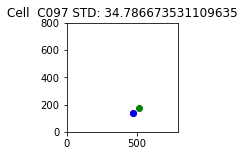

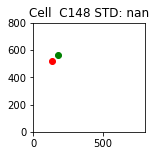

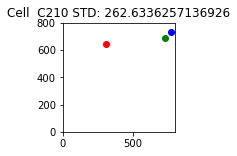

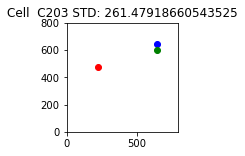

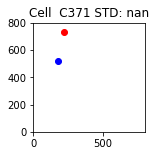

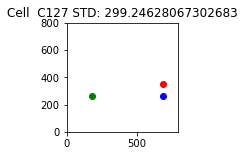

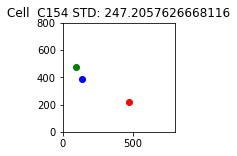

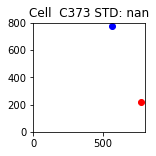

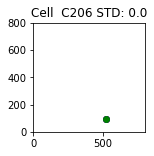

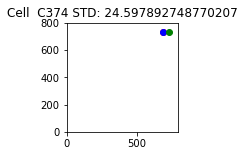

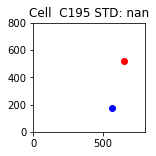

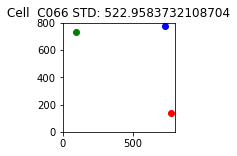

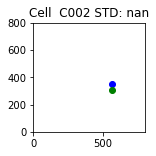

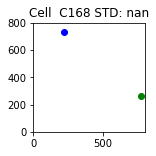

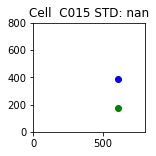

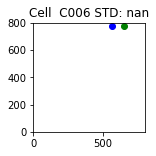

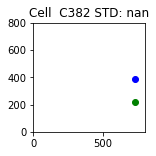

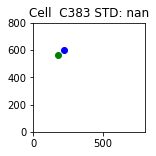

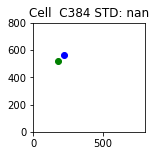

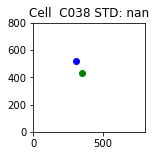

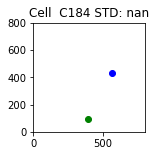

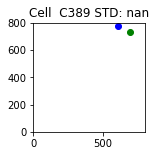

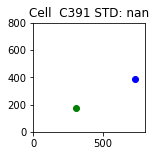

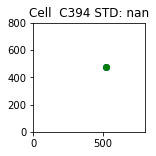

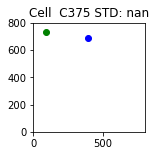

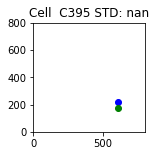

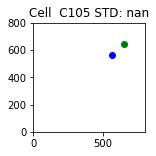

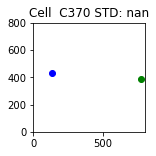

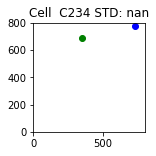

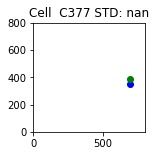

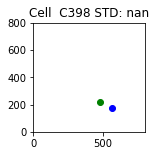

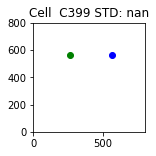

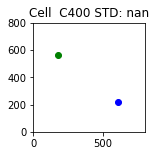

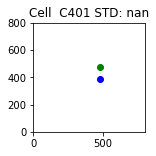

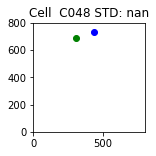

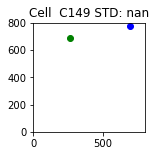

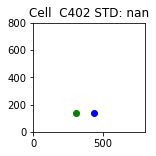

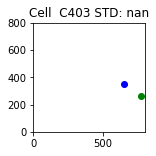

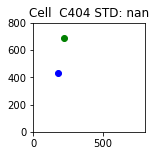

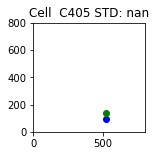

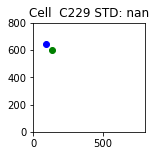

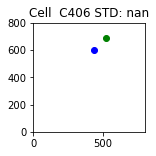

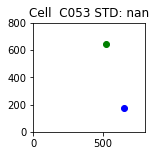

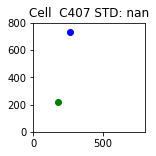

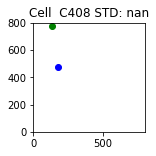

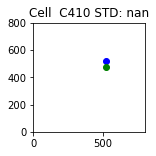

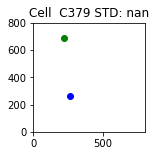

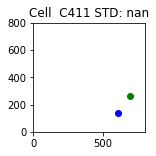

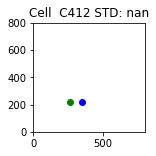

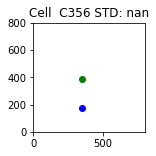

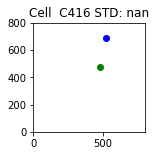

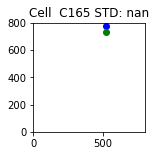

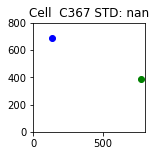

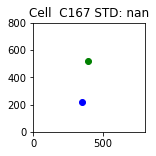

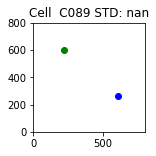

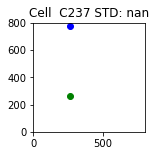

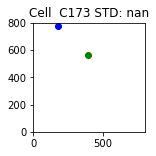

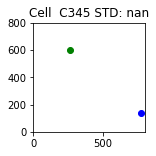

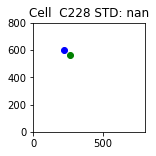

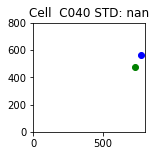

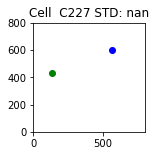

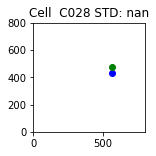

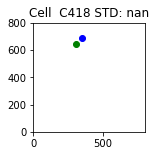

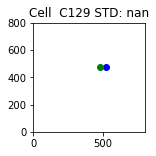

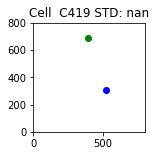

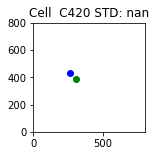

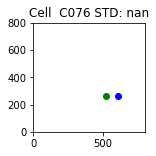

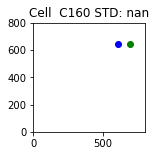

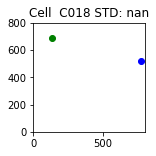

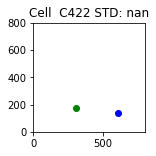

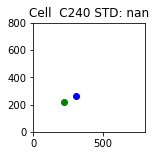

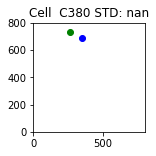

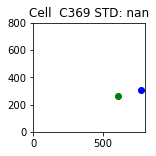

In [5]:
import math
import statistics

#df['centroid_x']=(df['Place field centre_x 29']+df['Place field centre_x 30']+df['Place field centre_x 31'])/4
#df['centroid_y']=(df['Place field centre_y 29']+df['Place field centre_y 30']+df['Place field centre_y 31'])/4

for i in range(len(df.index)):
    
    df.loc[i, 'Stdev_x'] = statistics.stdev([df.loc[i,'Place field centre_x 29'],df.loc[i,'Place field centre_x 30'],df.loc[i, 'Place field centre_x 31']])
    df.loc[i, 'Stdev_y'] = statistics.stdev([df.loc[i,'Place field centre_y 29'],df.loc[i,'Place field centre_y 30'],df.loc[i, 'Place field centre_y 31']])
    df.loc[i, 'Stdev_centroid'] = math.sqrt(df.loc[i,'Stdev_x']**2+df.loc[i,'Stdev_y']**2)

    fig=plt.figure(figsize=(2,2))
    plt.scatter(df.loc[i,'Place field centre_x 29'],df.loc[i,'Place field centre_y 29'], color='r')
    plt.scatter(df.loc[i,'Place field centre_x 30'],df.loc[i,'Place field centre_y 30'], color='b')
    plt.scatter(df.loc[i,'Place field centre_x 31'],df.loc[i,'Place field centre_y 31'], color='g')


    plt.xlim((0,800))
    plt.ylim(0,800)
    plt.title('Cell '+str(df['Cell IDS'][i]) + ' STD: ' + str(df['Stdev_centroid'][i]))
    plt.show()
    
    

In [6]:
df_common_cells=df[df['Stdev_centroid']<=200]
df_common_cells=df_common_cells.reset_index()
df_common_cells=df_common_cells.drop(['index'], axis=1)
df_common_cells

,Cell IDS,Place cells 29,Criteria 29,SI 29,Percentile 29,Place field centre_x 29,Place field centre_y 29,Rate Map 29,Place_field_bins 29,Place cells direction 0 29,Criteria direction 0 29,SI direction 0 29,Percentile direction 0 29,Place field centre_x 0 29,Place field centre_y 0 29,Rate Map 0 29,Place cells direction 1 29,Criteria direction 1 29,SI direction 1 29,Percentile direction 1 29,Place field centre_x 1 29,Place field centre_y 1 29,Rate Map 1 29,Place cells direction 2 29,Criteria direction 2 29,SI direction 2 29,Percentile direction 2 29,Place field centre_x 2 29,Place field centre_y 2 29,Rate Map 2 29,Place cells direction 3 29,Criteria direction 3 29,SI direction 3 29,Percentile direction 3 29,Place field centre_x 3 29,Place field centre_y 3 29,Rate Map 3 29,Place cells 30,Criteria 30,SI 30,Percentile 30,Place field centre_x 30,Place field centre_y 30,Rate Map 30,Place_field_bins 30,Place cells direction 0 30,Criteria direction 0 30,SI direction 0 30,Percentile direction 0 30,Place field centre_x 0 30,Place field centre_y 0 30,Rate Map 0 30,Place cells direction 1 30,Criteria direction 1 30,SI direction 1 30,Percentile direction 1 30,Place field centre_x 1 30,Place field centre_y 1 30,Rate Map 1 30,Place cells direction 2 30,Criteria direction 2 30,SI direction 2 30,Percentile direction 2 30,Place field centre_x 2 30,Place field centre_y 2 30,Rate Map 2 30,Place cells direction 3 30,Criteria direction 3 30,SI direction 3 30,Percentile direction 3 30,Place field centre_x 3 30,Place field centre_y 3 30,Rate Map 3 30,Place cells 31,Criteria 31,SI 31,Percentile 31,Place field centre_x 31,Place field centre_y 31,Rate Map 31,Place_field_bins 31,Place cells direction 0 31,Criteria direction 0 31,SI direction 0 31,Percentile direction 0 31,Place field centre_x 0 31,Place field centre_y 0 31,Rate Map 0 31,Place cells direction 1 31,Criteria direction 1 31,SI direction 1 31,Percentile direction 1 31,Place field centre_x 1 31,Place field centre_y 1 31,Rate Map 1 31,Place cells direction 2 31,Criteria direction 2 31,SI direction 2 31,Percentile direction 2 31,Place field centre_x 2 31,Place field centre_y 2 31,Rate Map 2 31,Place cells direction 3 31,Criteria direction 3 31,SI direction 3 31,Percentile direction 3 31,Place field centre_x 3 31,Place field centre_y 3 31,Rate Map 3 31,Stdev_x,Stdev_y,Stdev_centroid
0,C205,0.0,[1. 1. 0. 0.],0.009235,100.00,135.9280,647.1856,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[[12, 12], [12, 13], [12, 14], [13, 12], [13, ...",0.0,[1. 1. 0. 0.],0.005715,100.00,135.9280,647.1856,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 1. 0. 0.],0.023088,100.00,135.9280,647.1856,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,[1. 1. 0. 0.],0.009131,99.98,135.9280,647.1856,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 1. 0. 0.],0.003943,100.00,263.7424,689.7904,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0....,"[[4, 5], [4, 6], [5, 1], [5, 4], [5, 5], [5, 6...",0.0,[1. 1. 0. 0.],0.006136,99.97,391.5568,604.5808,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0....,0.0,[1. 1. 0. 0.],0.008299,99.98,263.7424,689.7904,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 0. 0. 0.],0.003231,0.33,476.7664,476.7664,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 1. 0. 0.],0.006396,100.00,306.3472,732.3952,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0....,"[[5, 11], [6, 11], [9, 9], [10, 7], [11, 6], [...",0.0,[1. 1. 0. 0.],0.007629,99.91,391.5568,732.3952,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 1. 0. 0.],0.017000,99.68,306.3472,732.3952,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.688964,42.604800,98.391571
1,C007,0.0,[1. 1. 1. 0.],0.005707,100.00,178.5328,391.5568,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[[0, 8], [0, 9], [1, 1], [1, 5], [1, 8], [1, 9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 0. 0. 0.],0.008957,98.17,178.5328,434.1616,[[0. 0. 0. 0. 0.

# H2225 had 36 cells  that had a centroid within 200px

In [8]:
df_place_cells= df_common_cells[df_common_cells['Percentile 29']>=99]
df_place_cells= df_place_cells[df_place_cells['Percentile 30']>=99]
df_place_cells= df_place_cells[df_place_cells['Percentile 31']>=99]
df_place_cells=df_place_cells.reset_index()
df_place_cells=df_place_cells.drop(['index'], axis=1)
df_place_cells

,Cell IDS,Place cells 29,Criteria 29,SI 29,Percentile 29,Place field centre_x 29,Place field centre_y 29,Rate Map 29,Place_field_bins 29,Place cells direction 0 29,Criteria direction 0 29,SI direction 0 29,Percentile direction 0 29,Place field centre_x 0 29,Place field centre_y 0 29,Rate Map 0 29,Place cells direction 1 29,Criteria direction 1 29,SI direction 1 29,Percentile direction 1 29,Place field centre_x 1 29,Place field centre_y 1 29,Rate Map 1 29,Place cells direction 2 29,Criteria direction 2 29,SI direction 2 29,Percentile direction 2 29,Place field centre_x 2 29,Place field centre_y 2 29,Rate Map 2 29,Place cells direction 3 29,Criteria direction 3 29,SI direction 3 29,Percentile direction 3 29,Place field centre_x 3 29,Place field centre_y 3 29,Rate Map 3 29,Place cells 30,Criteria 30,SI 30,Percentile 30,Place field centre_x 30,Place field centre_y 30,Rate Map 30,Place_field_bins 30,Place cells direction 0 30,Criteria direction 0 30,SI direction 0 30,Percentile direction 0 30,Place field centre_x 0 30,Place field centre_y 0 30,Rate Map 0 30,Place cells direction 1 30,Criteria direction 1 30,SI direction 1 30,Percentile direction 1 30,Place field centre_x 1 30,Place field centre_y 1 30,Rate Map 1 30,Place cells direction 2 30,Criteria direction 2 30,SI direction 2 30,Percentile direction 2 30,Place field centre_x 2 30,Place field centre_y 2 30,Rate Map 2 30,Place cells direction 3 30,Criteria direction 3 30,SI direction 3 30,Percentile direction 3 30,Place field centre_x 3 30,Place field centre_y 3 30,Rate Map 3 30,Place cells 31,Criteria 31,SI 31,Percentile 31,Place field centre_x 31,Place field centre_y 31,Rate Map 31,Place_field_bins 31,Place cells direction 0 31,Criteria direction 0 31,SI direction 0 31,Percentile direction 0 31,Place field centre_x 0 31,Place field centre_y 0 31,Rate Map 0 31,Place cells direction 1 31,Criteria direction 1 31,SI direction 1 31,Percentile direction 1 31,Place field centre_x 1 31,Place field centre_y 1 31,Rate Map 1 31,Place cells direction 2 31,Criteria direction 2 31,SI direction 2 31,Percentile direction 2 31,Place field centre_x 2 31,Place field centre_y 2 31,Rate Map 2 31,Place cells direction 3 31,Criteria direction 3 31,SI direction 3 31,Percentile direction 3 31,Place field centre_x 3 31,Place field centre_y 3 31,Rate Map 3 31,Stdev_x,Stdev_y,Stdev_centroid
0,C205,0.0,[1. 1. 0. 0.],0.009235,100.00,135.9280,647.1856,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[[12, 12], [12, 13], [12, 14], [13, 12], [13, ...",0.0,[1. 1. 0. 0.],0.005715,100.00,135.9280,647.1856,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 1. 0. 0.],0.023088,100.00,135.9280,647.1856,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0,[1. 1. 0. 0.],0.009131,99.98,135.9280,647.1856,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 1. 0. 0.],0.003943,100.00,263.7424,689.7904,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0....,"[[4, 5], [4, 6], [5, 1], [5, 4], [5, 5], [5, 6...",0.0,[1. 1. 0. 0.],0.006136,99.97,391.5568,604.5808,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0....,0.0,[1. 1. 0. 0.],0.008299,99.98,263.7424,689.7904,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 0. 0. 0.],0.003231,0.33,476.7664,476.7664,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 1. 0. 0.],0.006396,100.00,306.3472,732.3952,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0....,"[[5, 11], [6, 11], [9, 9], [10, 7], [11, 6], [...",0.0,[1. 1. 0. 0.],0.007629,99.91,391.5568,732.3952,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,0.0,[1. 1. 0. 0.],0.017000,99.68,306.3472,732.3952,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.688964,42.604800,98.391571
1,C007,0.0,[1. 1. 1. 0.],0.005707,100.00,178.5328,391.5568,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,"[[0, 8], [0, 9], [1, 1], [1, 5], [1, 8], [1, 9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[1. 0. 0. 0.],0.008957,98.17,178.5328,434.1616,[[0. 0. 0. 0. 0.

# Of these 28 fit the criteria of place cells

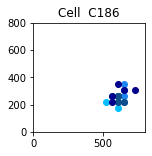

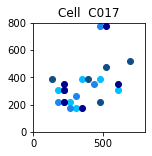

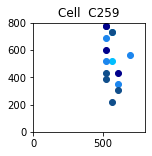

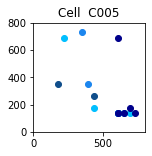

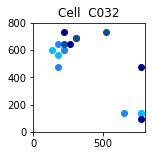

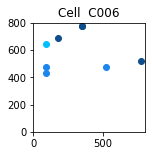

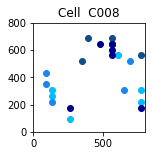

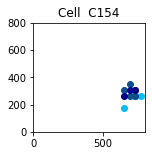

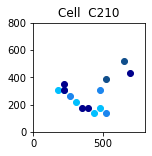

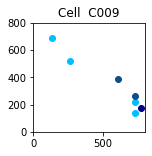

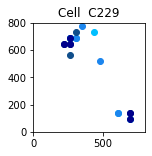

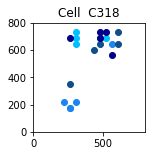

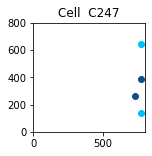

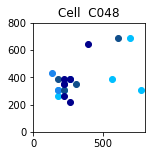

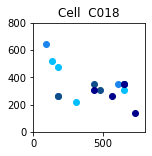

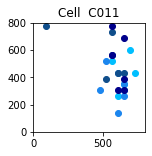

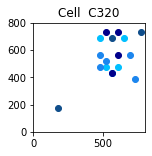

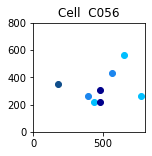

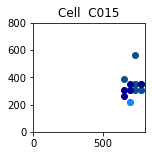

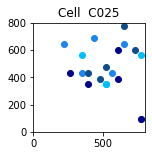

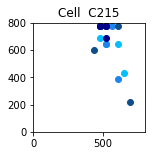

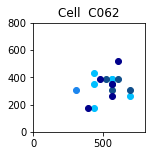

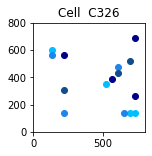

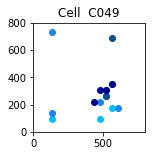

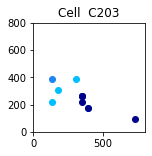

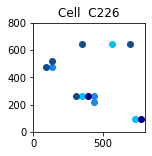

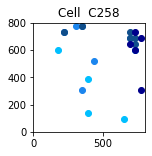

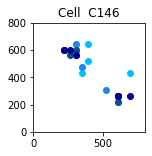

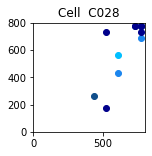

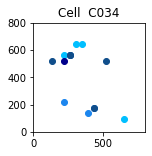

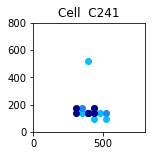

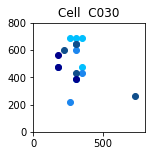

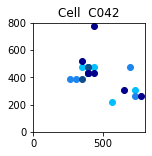

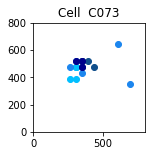

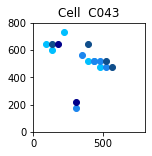

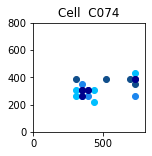

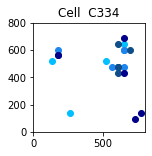

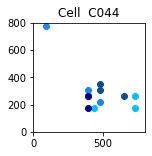

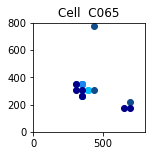

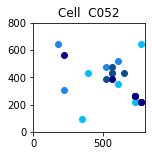

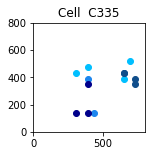

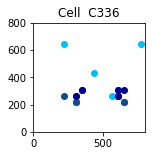

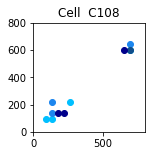

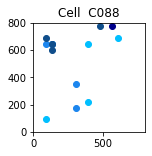

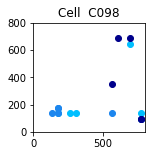

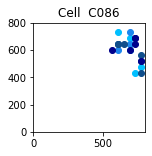

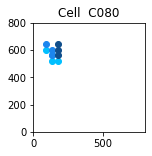

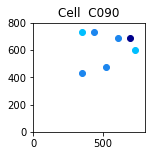

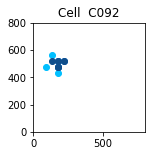

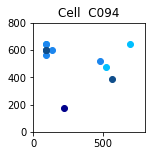

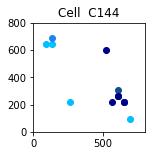

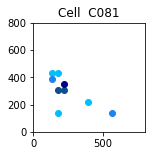

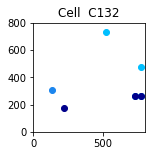

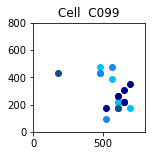

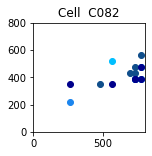

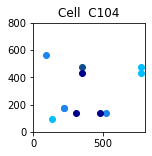

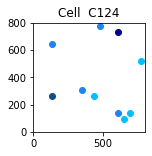

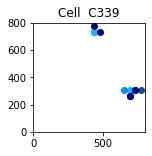

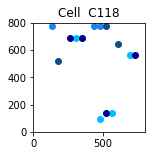

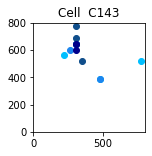

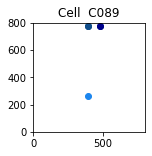

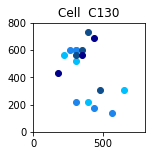

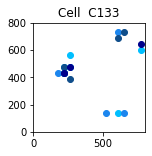

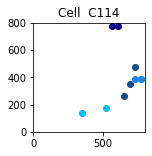

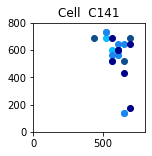

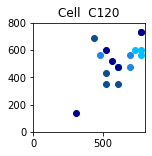

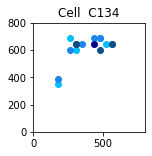

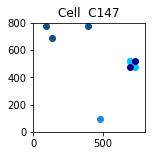

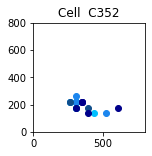

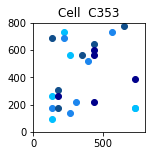

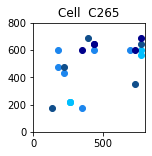

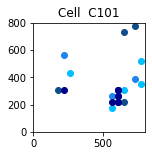

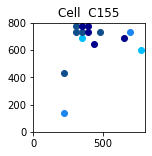

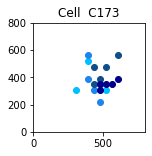

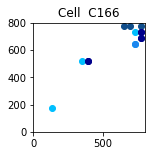

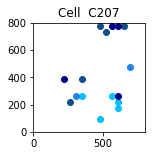

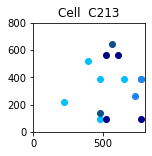

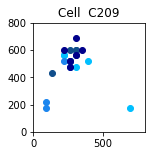

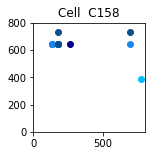

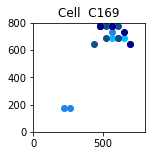

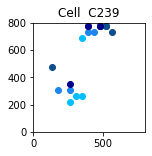

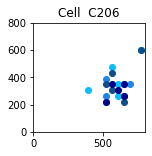

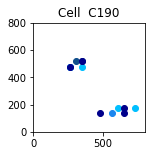

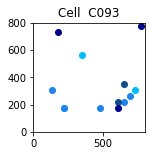

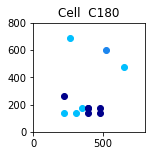

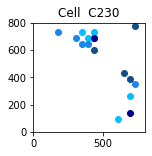

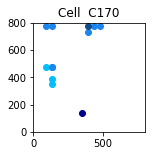

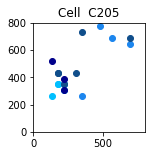

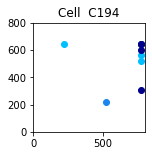

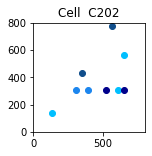

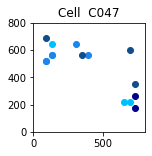

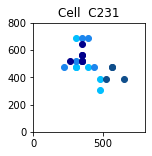

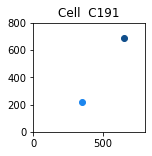

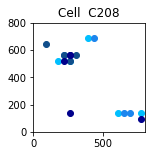

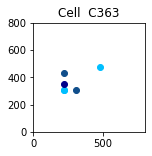

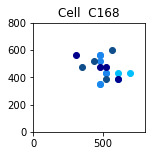

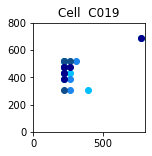

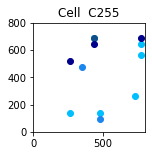

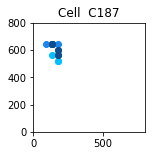

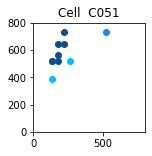

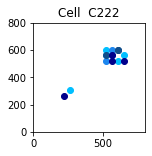

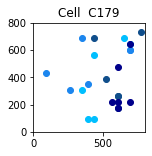

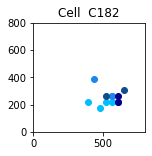

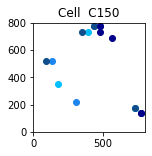

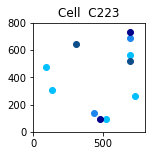

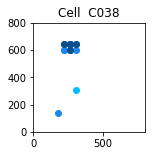

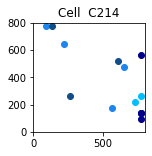

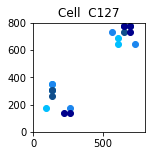

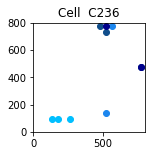

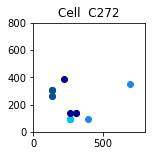

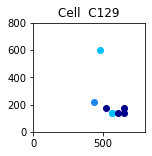

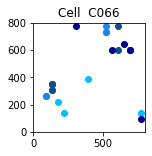

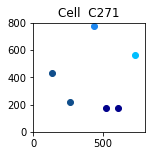

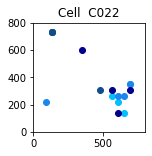

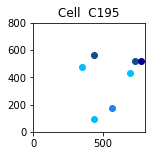

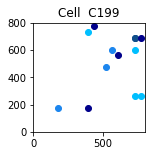

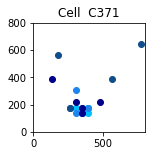

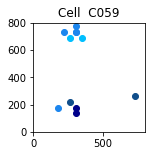

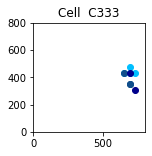

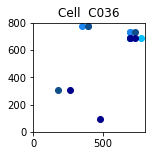

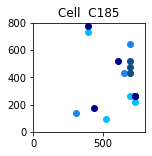

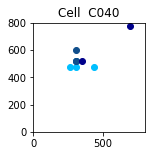

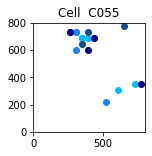

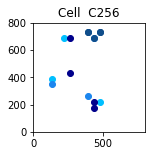

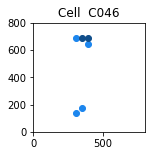

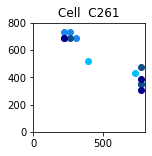

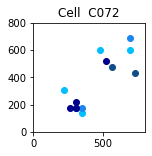

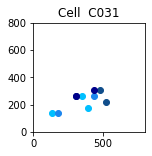

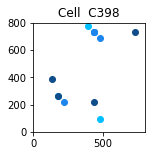

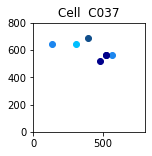

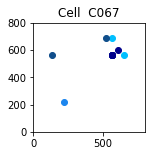

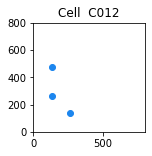

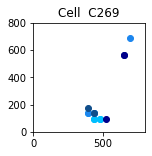

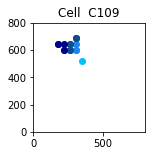

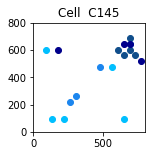

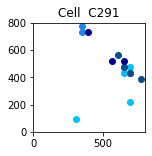

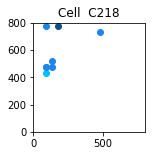

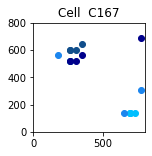

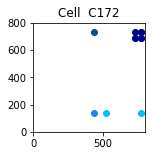

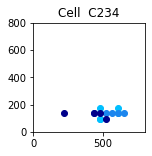

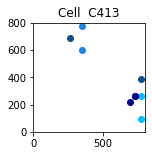

In [29]:
#for i in range(len(df.index)):

    fig=plt.figure(figsize=(2,2))
    plt.scatter(df.loc[i,'Place field centre_x 0 29'],df.loc[i,'Place field centre_y 0 29'], color='#00BFFF')
    plt.scatter(df.loc[i,'Place field centre_x 0 30'],df.loc[i,'Place field centre_y 0 30'], color='#00BFFF')
    plt.scatter(df.loc[i,'Place field centre_x 0 31'],df.loc[i,'Place field centre_y 0 31'], color='#00BFFF')
    plt.scatter(df.loc[i,'Place field centre_x 0 32'],df.loc[i,'Place field centre_y 0 32'], color='#00BFFF')
    plt.scatter(df.loc[i,'Place field centre_x 0 33'],df.loc[i,'Place field centre_y 0 33'], color='#00BFFF')
    plt.scatter(df.loc[i,'Place field centre_x 0 34'],df.loc[i,'Place field centre_y 0 34'], color='#00BFFF')
    
    plt.scatter(df.loc[i,'Place field centre_x 1 29'],df.loc[i,'Place field centre_y 1 29'], color = '#1C86EE')
    plt.scatter(df.loc[i,'Place field centre_x 1 30'],df.loc[i,'Place field centre_y 1 30'], color = '#1C86EE')
    plt.scatter(df.loc[i,'Place field centre_x 1 31'],df.loc[i,'Place field centre_y 1 31'], color = '#1C86EE')
    plt.scatter(df.loc[i,'Place field centre_x 1 32'],df.loc[i,'Place field centre_y 1 32'], color = '#1C86EE')
    plt.scatter(df.loc[i,'Place field centre_x 1 33'],df.loc[i,'Place field centre_y 1 33'], color = '#1C86EE')
    plt.scatter(df.loc[i,'Place field centre_x 1 34'],df.loc[i,'Place field centre_y 1 34'], color = '#1C86EE')
    
    plt.scatter(df.loc[i,'Place field centre_x 2 29'],df.loc[i,'Place field centre_y 2 29'], color='#104E8B')
    plt.scatter(df.loc[i,'Place field centre_x 2 30'],df.loc[i,'Place field centre_y 2 30'], color='#104E8B')
    plt.scatter(df.loc[i,'Place field centre_x 2 31'],df.loc[i,'Place field centre_y 2 31'], color='#104E8B')
    plt.scatter(df.loc[i,'Place field centre_x 2 32'],df.loc[i,'Place field centre_y 2 32'], color='#104E8B')
    plt.scatter(df.loc[i,'Place field centre_x 2 33'],df.loc[i,'Place field centre_y 2 33'], color='#104E8B')
    plt.scatter(df.loc[i,'Place field centre_x 2 34'],df.loc[i,'Place field centre_y 2 34'], color='#104E8B')
    
    plt.scatter(df.loc[i,'Place field centre_x 3 29'],df.loc[i,'Place field centre_y 3 29'], color='#00008B')
    plt.scatter(df.loc[i,'Place field centre_x 3 30'],df.loc[i,'Place field centre_y 3 30'], color='#00008B')
    plt.scatter(df.loc[i,'Place field centre_x 3 31'],df.loc[i,'Place field centre_y 3 31'], color='#00008B')
    plt.scatter(df.loc[i,'Place field centre_x 3 32'],df.loc[i,'Place field centre_y 3 32'], color='#00008B')
    plt.scatter(df.loc[i,'Place field centre_x 3 33'],df.loc[i,'Place field centre_y 3 33'], color='#00008B')
    plt.scatter(df.loc[i,'Place field centre_x 3 34'],df.loc[i,'Place field centre_y 3 34'], color='#00008B')

    plt.xlim((0,800))
    plt.ylim(0,800)
    plt.title('Cell '+str(df['Cell IDS'][i]))
    plt.show()
    
    #Viewing place field centres in the 13 cells that had events in all 4 direction

In [11]:
df0 = df.loc[:2,['Cell IDS','Place field centre_x 0 30','Place field centre_x 0 31', 'Place field centre_y 0 29','Place field centre_y 0 30','Place field centre_y 0 31']]
df0=df0.dropna()
df0=df0.set_index('Cell IDS', drop=True)
df0

df1 = df.loc[:2,['Cell IDS','Place field centre_x 1 30','Place field centre_x 1 31', 'Place field centre_y 1 29','Place field centre_y 1 30','Place field centre_y 1 31']]
df1=df1.dropna()
df1=df1.set_index('Cell IDS', drop=True)
df1

df2 = df.loc[:2,['Cell IDS','Place field centre_x 2 30','Place field centre_x 2 31', 'Place field centre_y 2 29','Place field centre_y 2 30','Place field centre_y 2 31']]
df2=df2.dropna()
df2=df2.set_index('Cell IDS', drop=True)
df2

df3 = df.loc[:2,['Cell IDS','Place field centre_x 3 30','Place field centre_x 3 31', 'Place field centre_y 3 29','Place field centre_y 3 30','Place field centre_y 3 31']]
df3=df3.dropna()
df3=df3.set_index('Cell IDS', drop=True)
df3

dfa=pd.concat((df1, df2, df3, df0), axis=1)
dfa=dfa.dropna()
dfa=dfa.reset_index()
dfa=dfa.rename(columns={"index":"Cell IDS"})
pd.set_option('display.max_columns', None)
dfa

,Cell IDS,Place field centre_x 1 30,Place field centre_x 1 31,Place field centre_y 1 29,Place field centre_y 1 30,Place field centre_y 1 31,Place field centre_x 2 30,Place field centre_x 2 31,Place field centre_y 2 29,Place field centre_y 2 30,Place field centre_y 2 31,Place field centre_x 3 30,Place field centre_x 3 31,Place field centre_y 3 29,Place field centre_y 3 30,Place field centre_y 3 31,Place field centre_x 0 30,Place field centre_x 0 31,Place field centre_y 0 29,Place field centre_y 0 30,Place field centre_y 0 31


# 0 place cell was found to be common (ie have sufficient events) across all directions in all sessions

<ipython-input-10-1bd75a0680a3>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


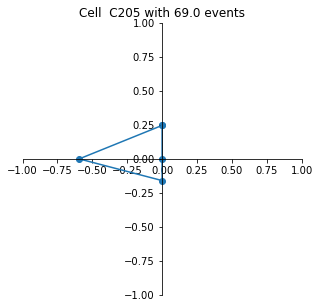

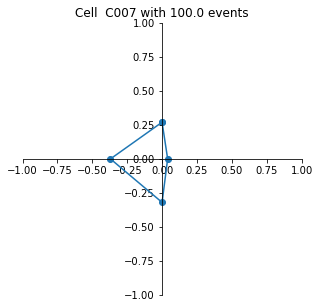

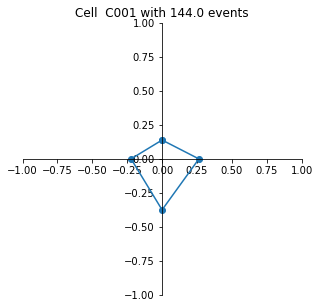

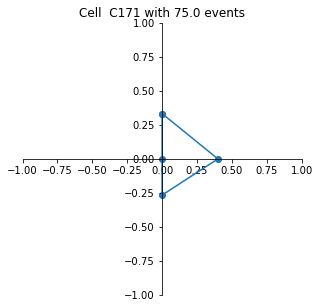

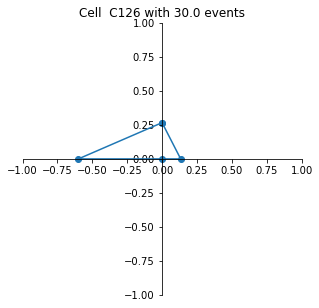

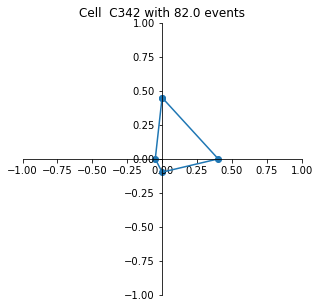

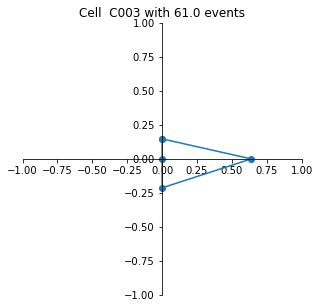

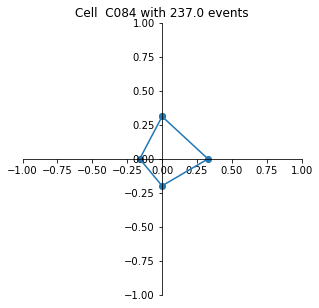

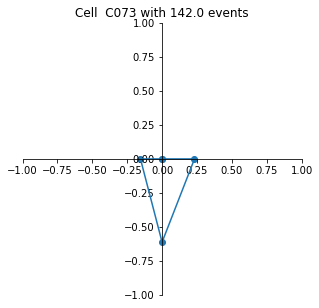

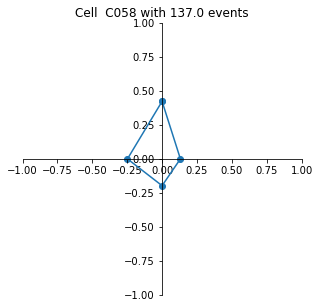

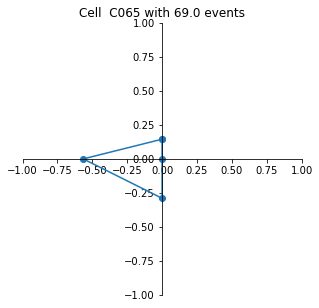

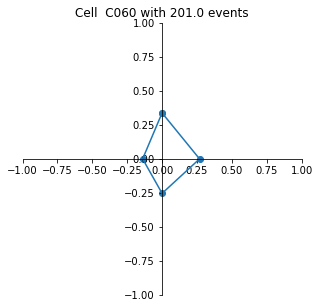

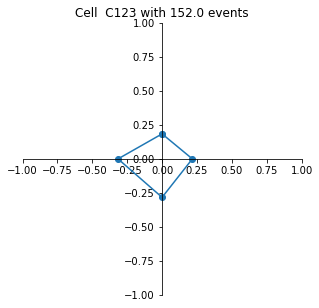

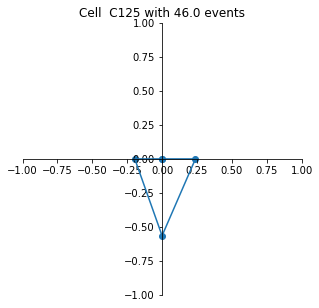

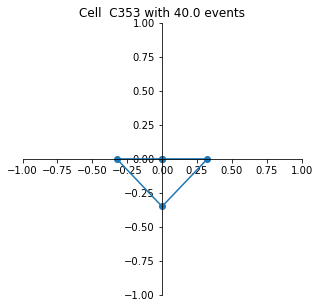

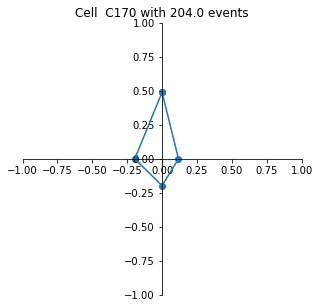

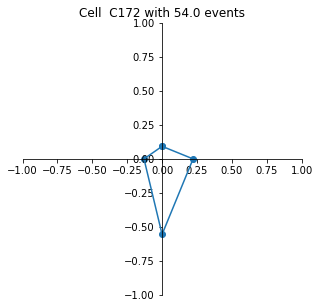

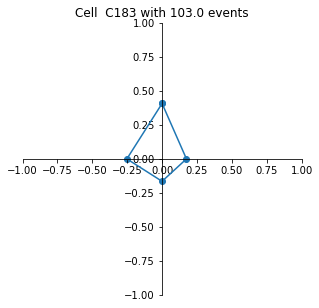

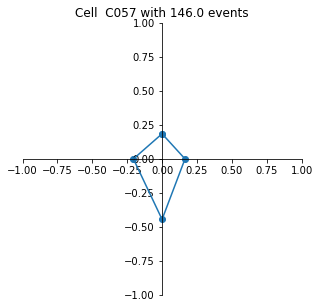

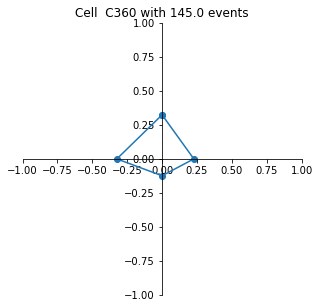

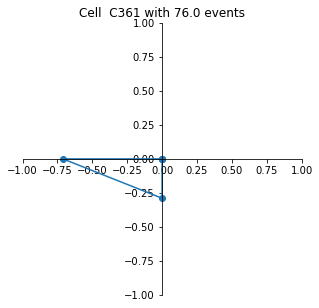

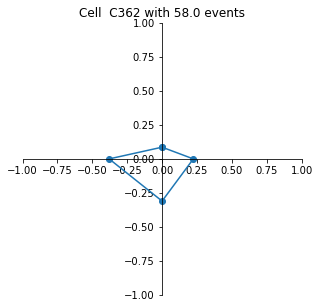

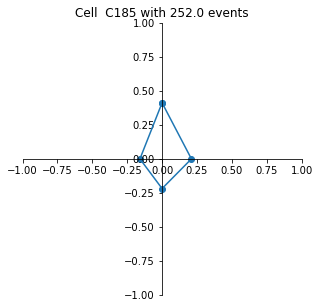

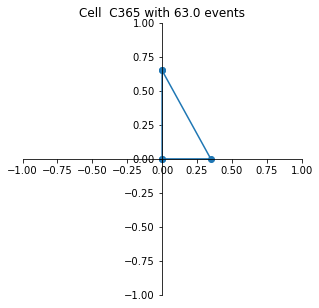

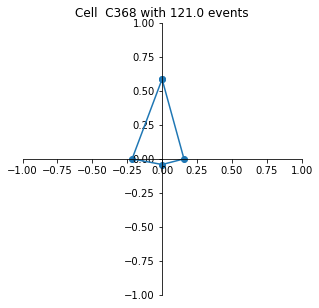

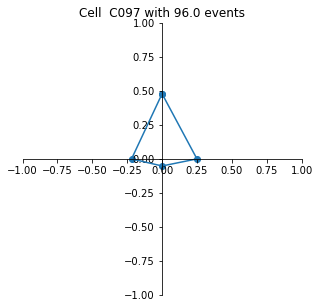

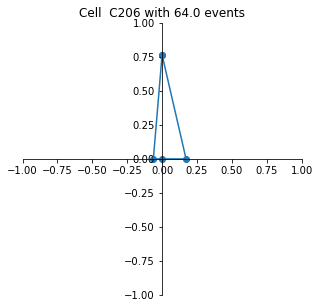

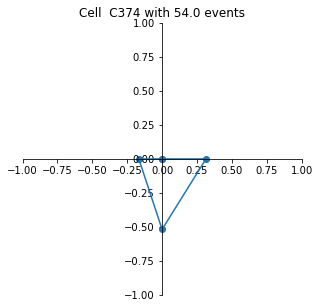

In [10]:
for i in range(len(df_place_cells.index)):
    
    df_place_cells=df_place_cells.fillna(0)
    a0=((np.sum(np.matrix(df_place_cells['Rate Map 0 29'][i])))+np.sum(np.matrix(df_place_cells['Rate Map 0 30'][i]))+np.sum(np.matrix(df_place_cells['Rate Map 0 31'][i])))
    a1=((np.sum(np.matrix(df_place_cells['Rate Map 1 29'][i])))+np.sum(np.matrix(df_place_cells['Rate Map 1 30'][i]))+np.sum(np.matrix(df_place_cells['Rate Map 1 31'][i])))
    a2=((np.sum(np.matrix(df_place_cells['Rate Map 2 29'][i])))+np.sum(np.matrix(df_place_cells['Rate Map 2 30'][i]))+np.sum(np.matrix(df_place_cells['Rate Map 2 31'][i])))
    a3=((np.sum(np.matrix(df_place_cells['Rate Map 3 29'][i])))+np.sum(np.matrix(df_place_cells['Rate Map 3 30'][i]))+np.sum(np.matrix(df_place_cells['Rate Map 3 31'][i])))
    b=a0+a1+a2+a3
    
    #normalised scatter
    fig=plt.figure(figsize=(5,5))
    x=[0,-(a1/b),0,(a3/b),0]
    y=[(a0/b), 0, -(a2/b), 0, (a0/b)]
    plt.scatter(x,y)
    plt.plot(x,y)
    
    #spine placement data centered
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    plt.xlim((-1,1))
    plt.ylim(-1,1)
    plt.title('Cell '+str(df_place_cells['Cell IDS'][i]) + ' with ' + str(b)+ ' events')
    plt.show()

# 13 directional cells/28